In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# import torch
import csv
import numpy as np
plt.rcParams['figure.figsize'] = [40, 20]
plt.rcParams.update({'font.size': 22})

In [42]:
# path_to_csv = './nn_linear_varying_widths_batches_results.csv'
path_to_csv = './crs_det_top_k_k_64_varying_widths_batches_results.csv'
# path_to_csv = './crs_det_top_k_compare_jit_nojit_full_sweep_batch_k_dims.csv'
data = np.genfromtxt(path_to_csv, delimiter=',', names=True, dtype=None)

In [43]:
data.shape, data

((432,),
 array([(   1,   64,   64, 2687.19262695, 0.26871926),
        (   1,   64,  128, 2723.82446289, 0.27238245),
        (   1,   64,  256, 2744.15356445, 0.27441536),
        (   1,   64,  512, 2784.90039062, 0.27849004),
        (   1,   64, 1024, 2705.40478516, 0.27054048),
        (   1,   64, 2048, 2685.14379883, 0.26851438),
        (   1,  128,   64, 2675.62573242, 0.26756257),
        (   1,  128,  128, 2674.94824219, 0.26749482),
        (   1,  128,  256, 2678.00097656, 0.2678001 ),
        (   1,  128,  512, 2703.43261719, 0.27034326),
        (   1,  128, 1024, 2707.32104492, 0.2707321 ),
        (   1,  128, 2048, 2719.10302734, 0.2719103 ),
        (   1,  256,   64, 2690.75341797, 0.26907534),
        (   1,  256,  128, 2686.28540039, 0.26862854),
        (   1,  256,  256, 2689.98876953, 0.26899888),
        (   1,  256,  512, 2746.69018555, 0.27466902),
        (   1,  256, 1024, 2739.359375  , 0.27393594),
        (   1,  256, 2048, 2752.39599609, 0.2752396 ),
 

In [44]:
unique_batches = np.unique(data['batch'])
unique_batches

array([   1,    2,    4,    8,   16,   32,   64,  128,  256,  512, 1024,
       2048])

In [45]:
unique_input_dims = np.unique(data['input_dim'])
unique_input_dims

array([  64,  128,  256,  512, 1024, 2048])

In [46]:
data_batch_1 = data[data['batch'] == 1]
data_batch_1.shape

(36,)

In [47]:
data_batch_1_input_dim_1 = data_batch_1[data_batch_1['input_dim'] == 1]
data_batch_1_input_dim_1.shape

(0,)

In [48]:
data_batch_1_input_dim_2 = data_batch_1[data_batch_1['input_dim'] == 1]
data_batch_1_input_dim_2.shape

(0,)

In [49]:
data.dtype

dtype([('batch', '<i8'), ('input_dim', '<i8'), ('output_dim', '<i8'), ('total_forward_timems', '<f8'), ('mean_forward_timems', '<f8')])

In [50]:
FIELD = 'mean_forward_time(ms)'
FIELD = 'mean_forward_timems'
# FIELD = 'mean_runtime_jit_ms'

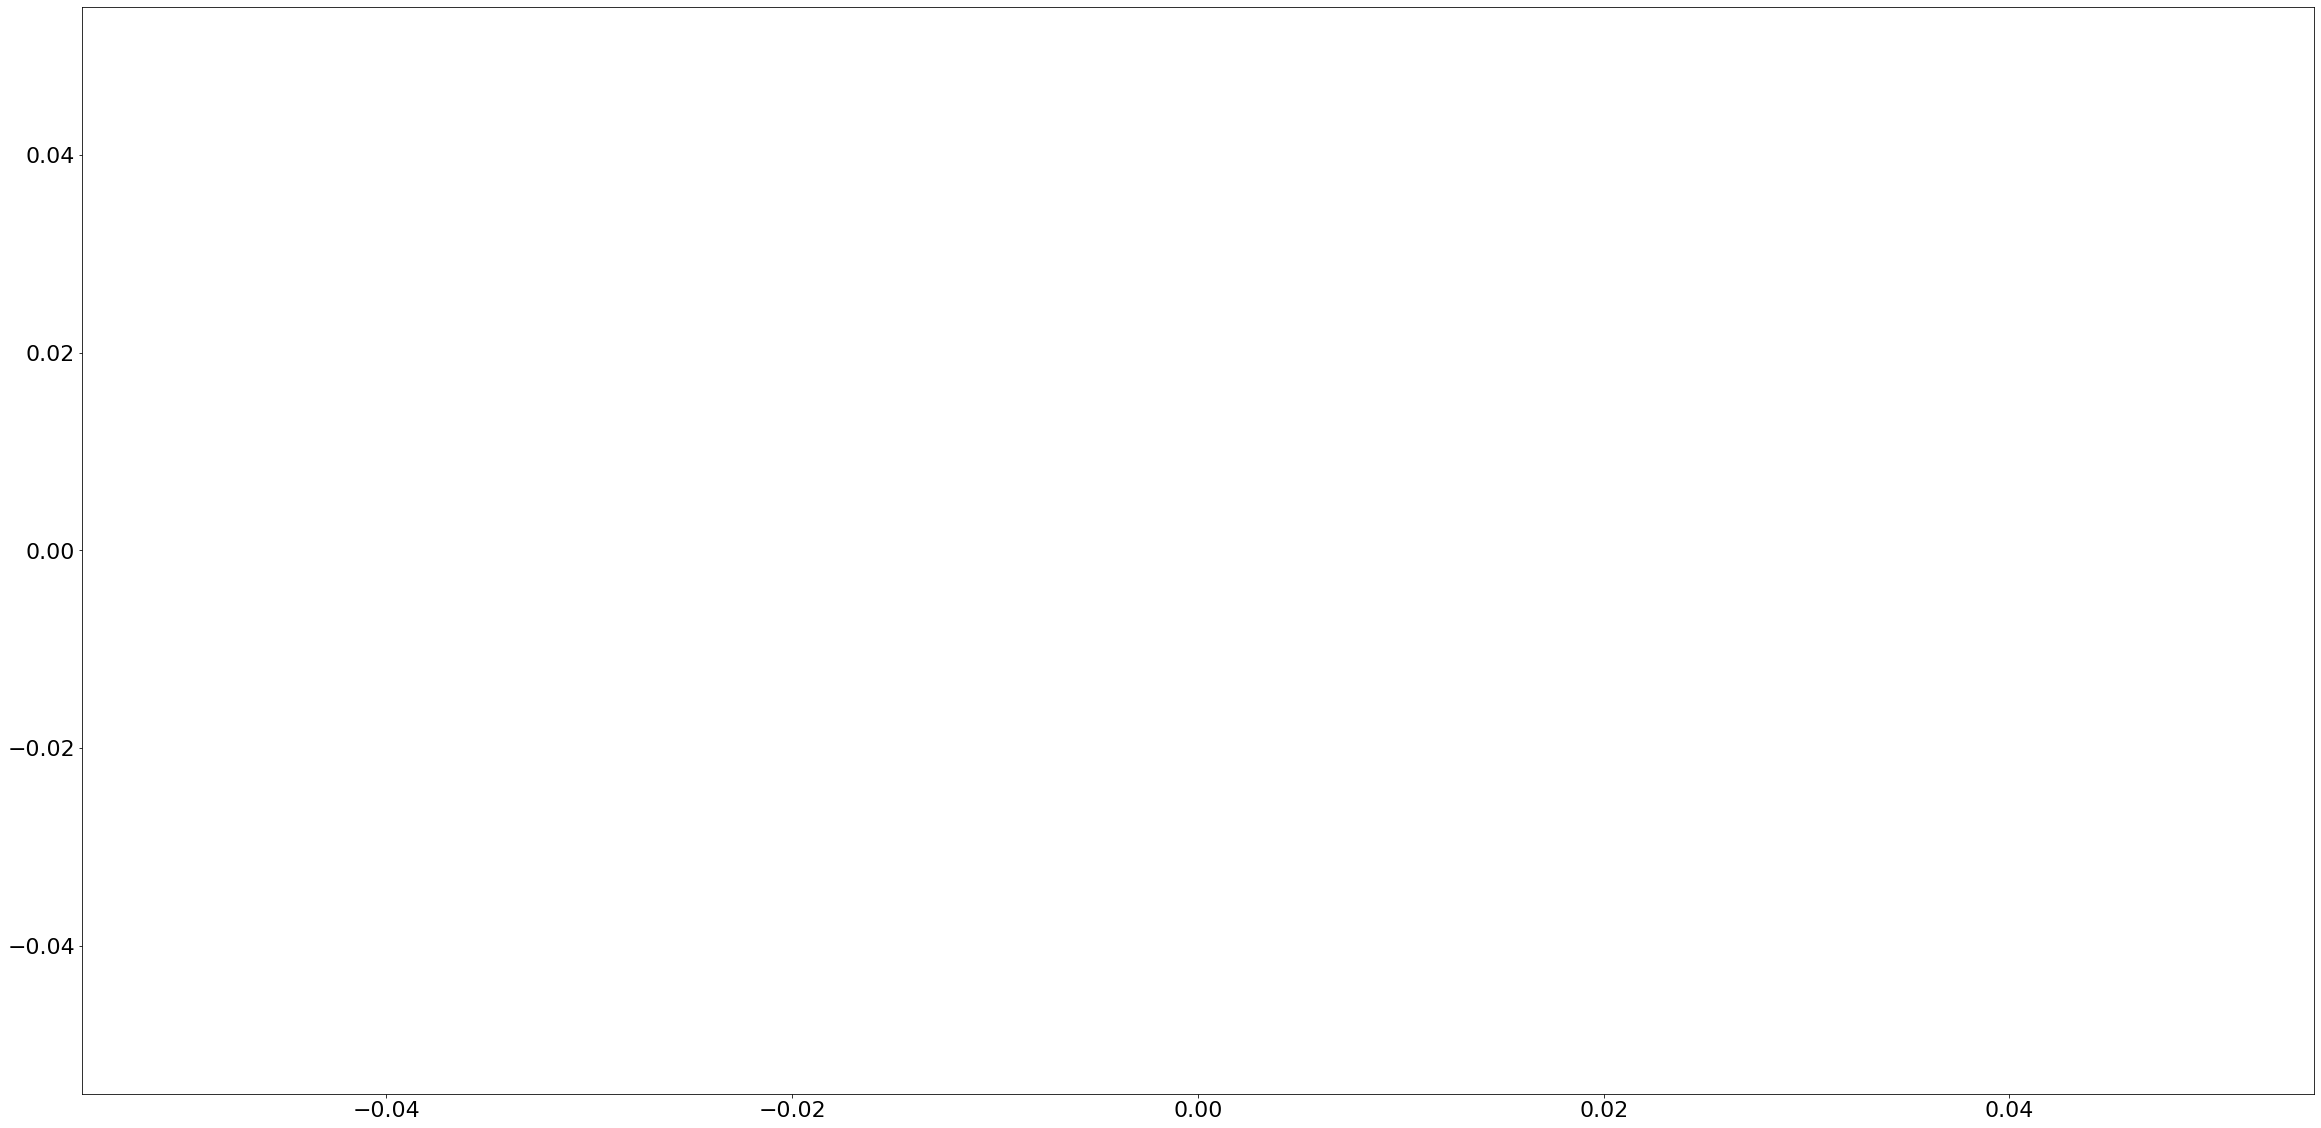

In [51]:
plt.plot(data_batch_1_input_dim_1[FIELD], label='data_batch_1_input_dim_1')

Text(0.5, 1.0, 'batch=1 mean_forward_time(ms) vs output_dim')

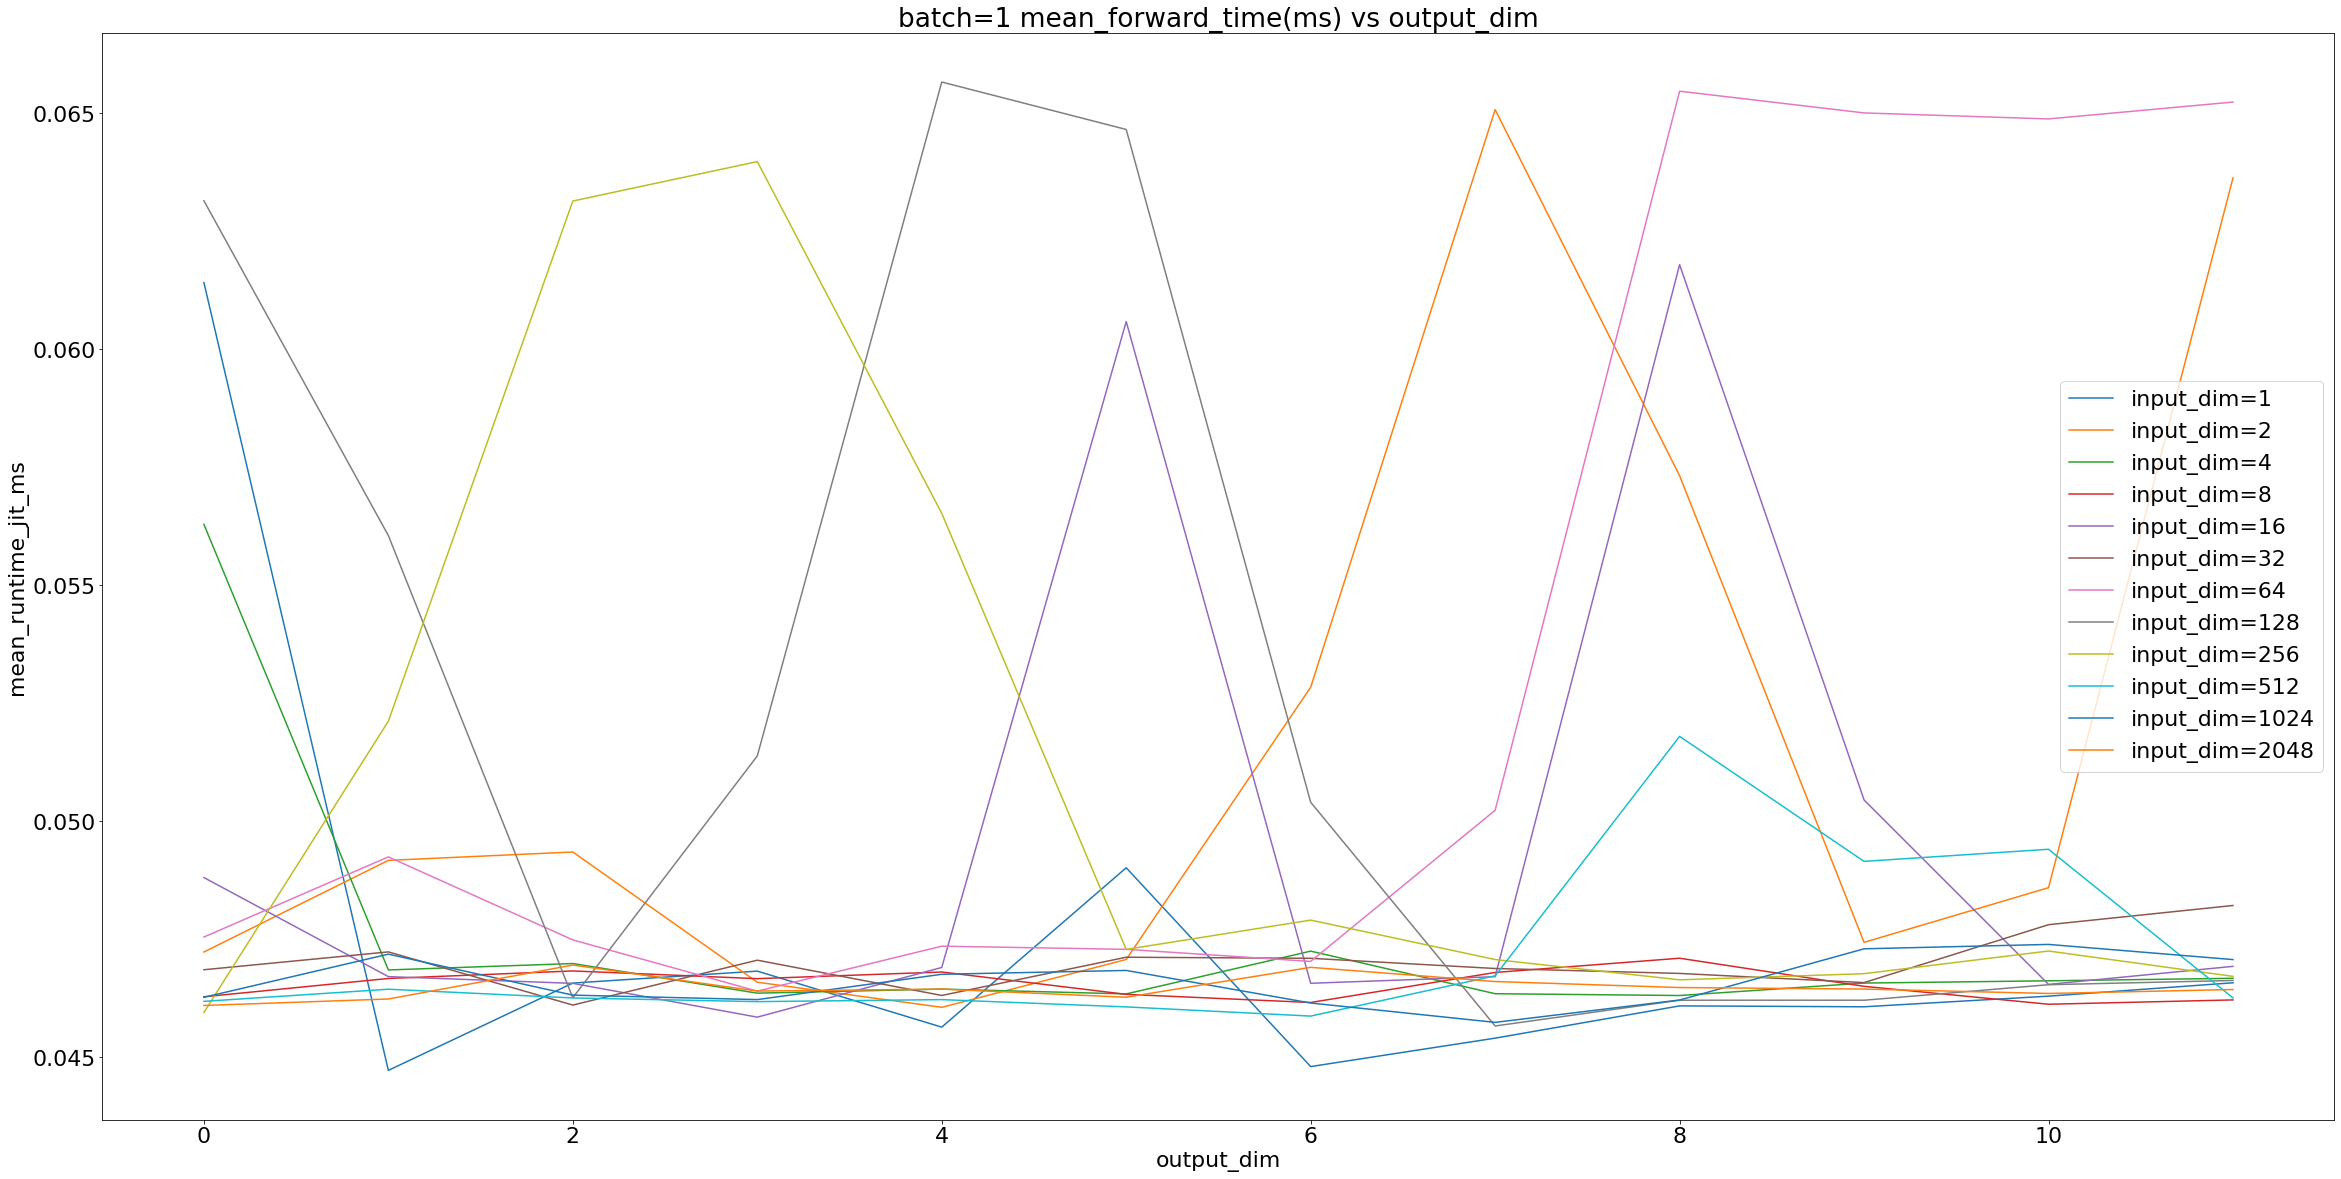

In [15]:
for i in unique_input_dims:
    data_batch_1_input_dim_i = data_batch_1[data_batch_1['input_dim'] == i]
    plt.plot(data_batch_1_input_dim_i[FIELD], label='input_dim={}'.format(i))
plt.legend(loc='right')
plt.xlabel('output_dim')
plt.ylabel('mean_runtime_jit_ms')
plt.title('batch=1 mean_forward_time(ms) vs output_dim')

12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12


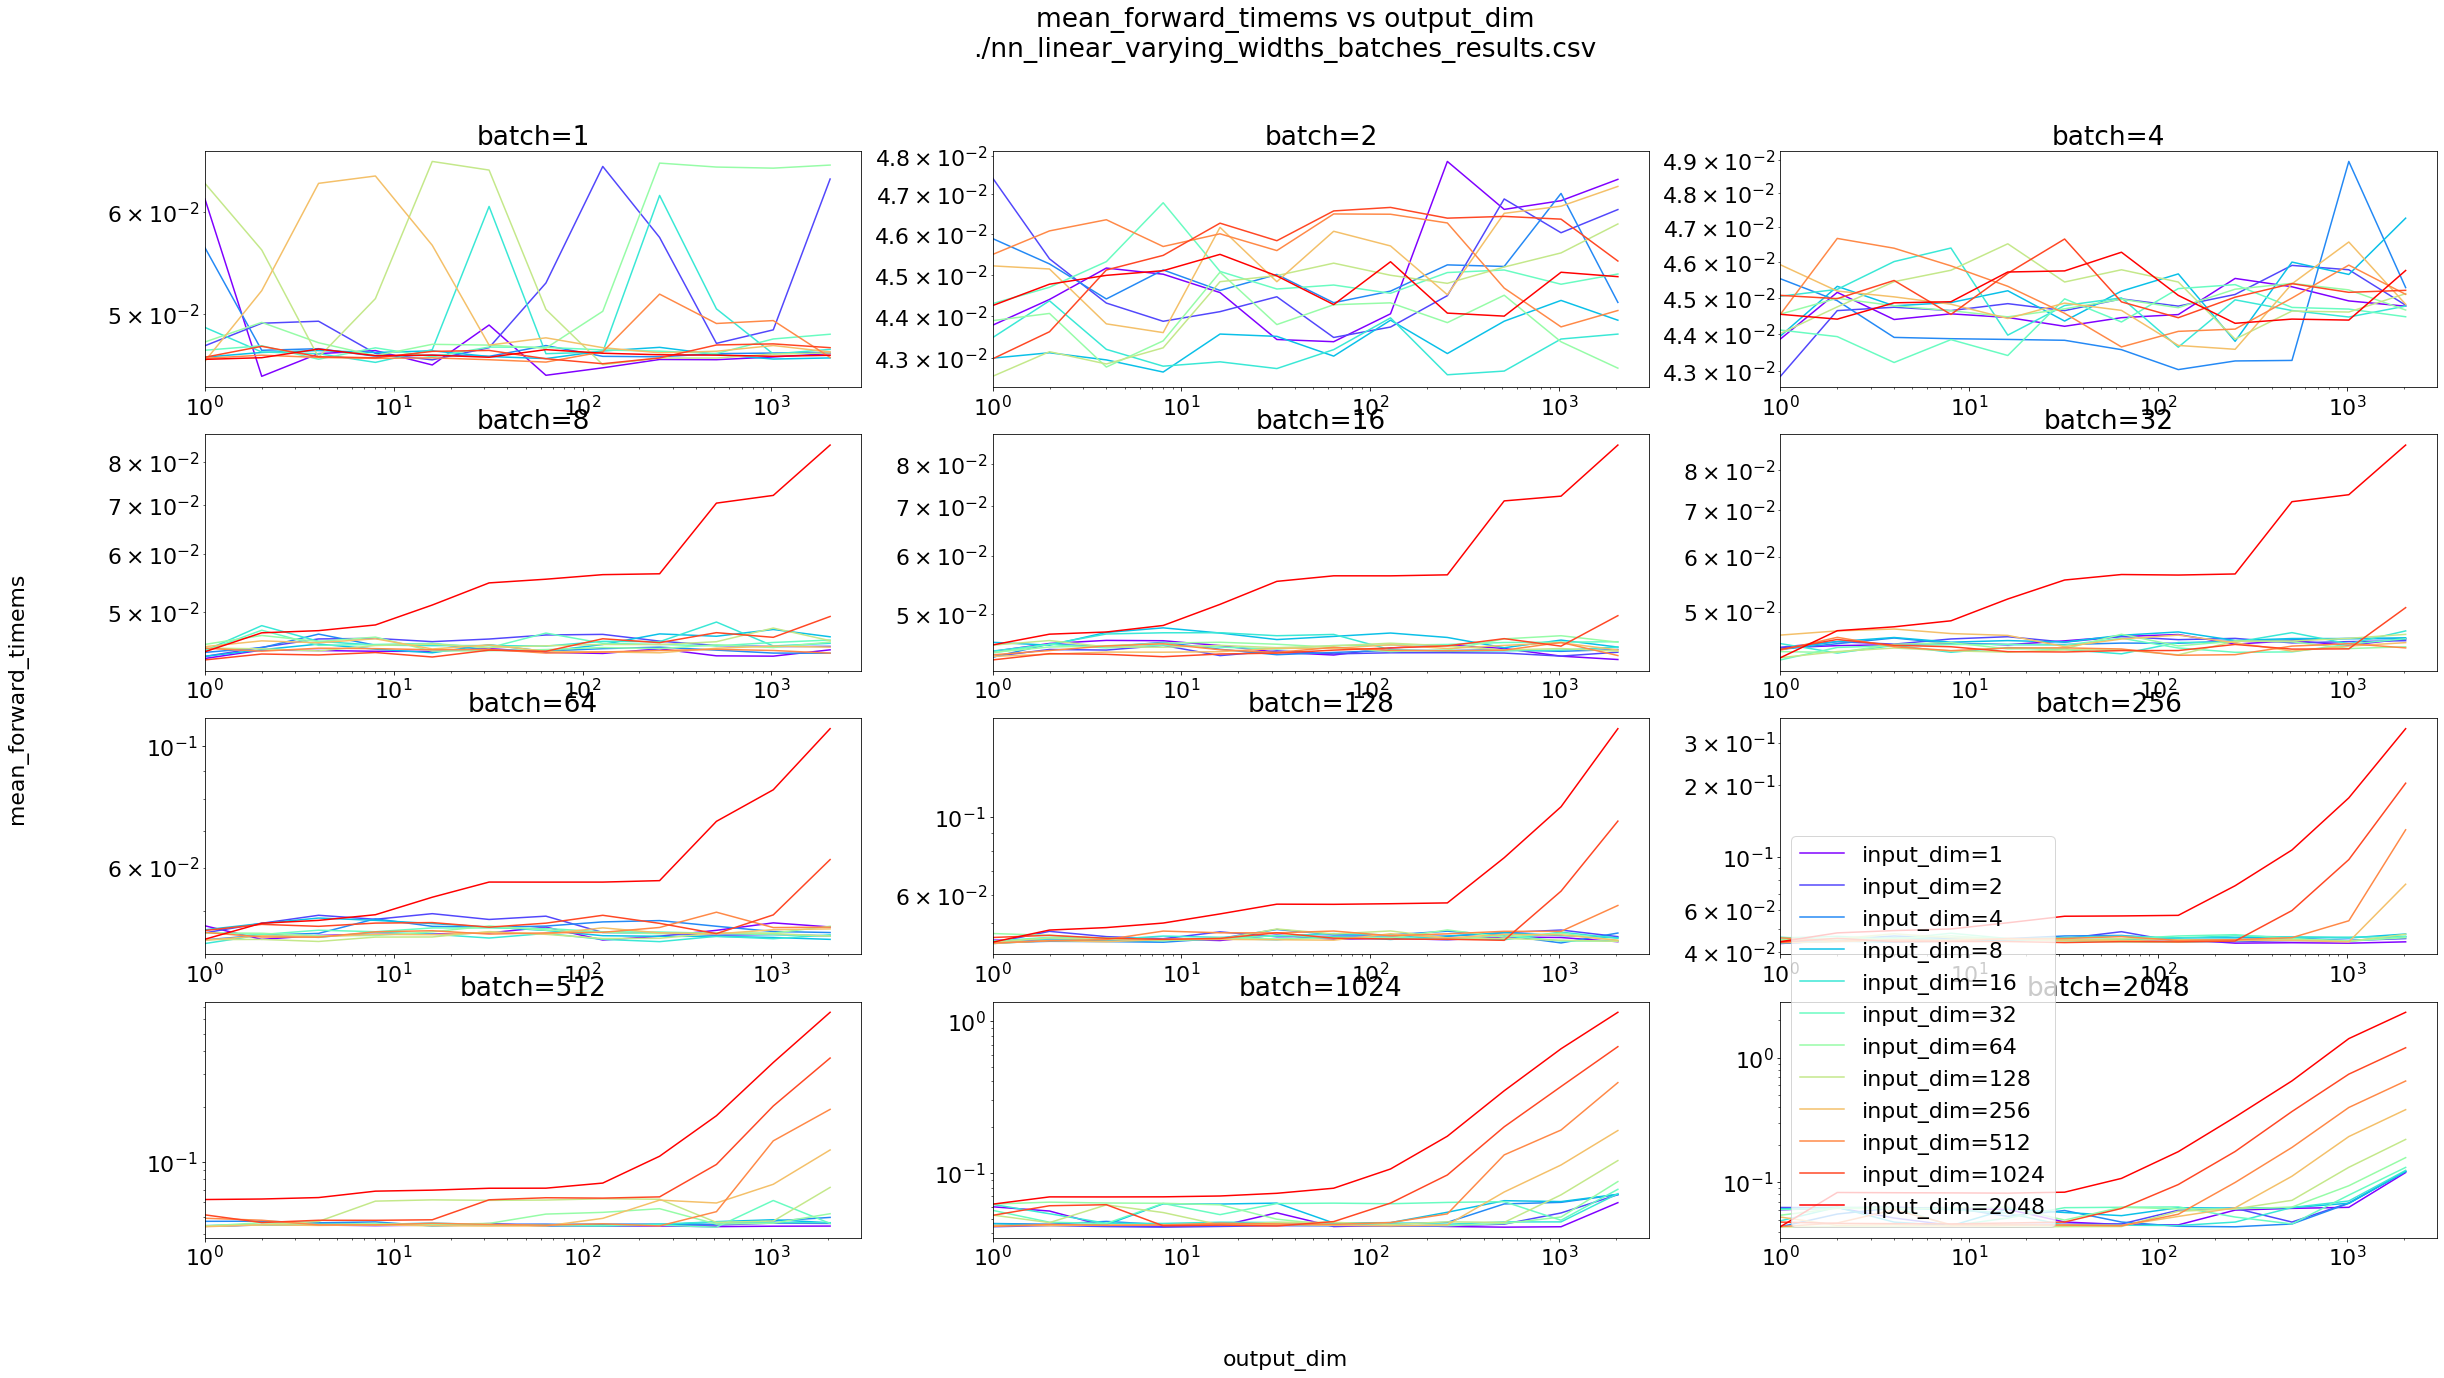

In [22]:
fig, axs = plt.subplots(4, 3)
colors = cm.rainbow(np.linspace(0, 1, len(unique_input_dims)))

for batch_number, batch in enumerate(unique_batches):
    data_batch_j = data[data['batch'] == batch]
    ax = axs.flat[batch_number]
    for number, i in enumerate(unique_input_dims):
        data_batch_j_input_dim_i__many_k = data_batch_j[data_batch_j['input_dim'] == i]
        data_batch_j_input_dim_i = data_batch_j_input_dim_i__many_k  # comment when running with k values
#         data_batch_j_input_dim_i = data_batch_j_input_dim_i__many_k[data_batch_j_input_dim_i__many_k['k'] == 64]  # select single k.  # uncomment when running with k values
#         ax.plot([2**i for i in range(len(unique_input_dims))], data_batch_j_input_dim_i['mean_forward_timems'], label='input_dim={}'.format(i), c=colors[number])
#         print(unique_input_dims)
        unique_output_dims = np.unique(data_batch_j_input_dim_i['output_dim'])
        print(len(data_batch_j_input_dim_i[FIELD]), len(unique_output_dims))
        # unique_input_dims = np.unique(data['input_dim'])
        # print(data_batch_j_input_dim_i)
        
        ax.plot(unique_output_dims, data_batch_j_input_dim_i[FIELD], label='input_dim={}'.format(i), c=colors[number])
        ax.title.set_text('batch={}'.format(batch))
        ax.set_yscale('log')  # comment this out for normal plot.
        ax.set_xscale('log')  # comment this out for normal plot.
        ax.set_xlim(left=1)

plt.suptitle(FIELD+' vs output_dim\n'+path_to_csv)
plt.legend(loc='lower left')
fig.text(0.5, 0.04, 'output_dim', ha='center', va='center')
fig.text(0.06, 0.5, FIELD, ha='center', va='center', rotation='vertical')
plt.savefig(path_to_csv+'.png')

In [ ]:
fig, axs = plt.subplots(4, 3)
colors = cm.rainbow(np.linspace(0, 1, len(unique_input_dims)))

for batch_number, batch in enumerate(unique_batches):
    data_batch_j = data[data['batch'] == batch]
    ax = axs.flat[batch_number]
    for number, i in enumerate(unique_input_dims):
        data_batch_j_input_dim_i = data_batch_j[data_batch_j['input_dim'] == i]
        print(f'data_batch_j_input_dim_i.dtype={data_batch_j_input_dim_i.dtype}')
        ax.plot(
            [2**i for i in range(len(unique_input_dims))],
            data_batch_j_input_dim_i['mean_forward_timems'],
            label='input_dim={}'.format(i), c=colors[number]
        )
        ax.title.set_text('batch={}'.format(batch))
        # ax.set_yscale('log')  # comment this out for normal plot.
        # ax.set_xscale('log')  # comment this out for normal plot.

plt.suptitle('mean_forward_time(ms) vs output_dim')
plt.legend(loc='lower left')
fig.text(0.5, 0.04, 'output_dim', ha='center', va='center')
fig.text(0.06, 0.5, 'mean_forward_time(ms)', ha='center', va='center', rotation='vertical')
# plt.savefig(path_to_csv+'.png')

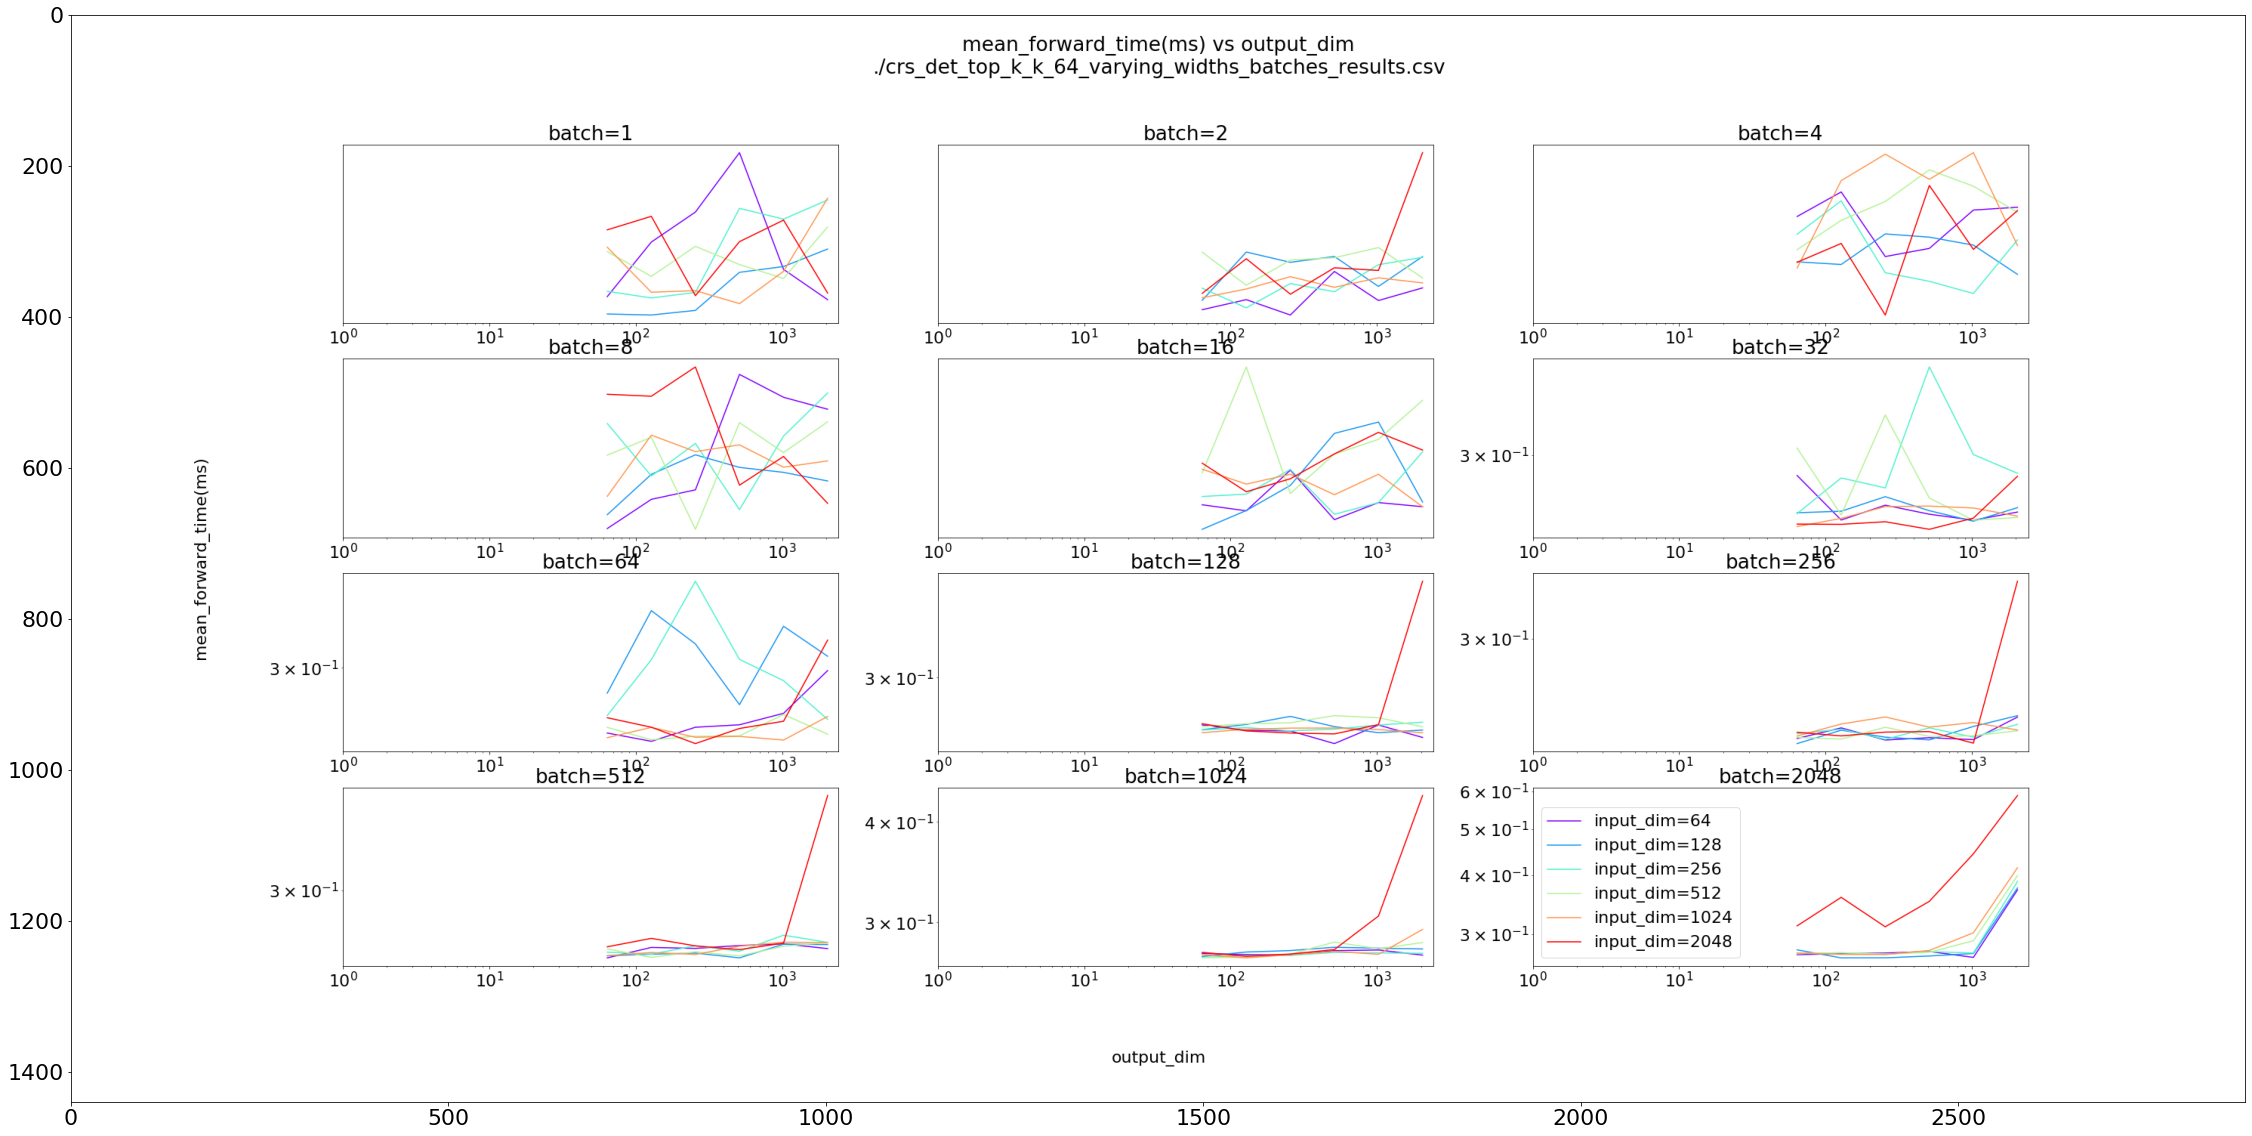

In [18]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('./crs_det_top_k_k_64_varying_widths_batches_results.csv.png'))

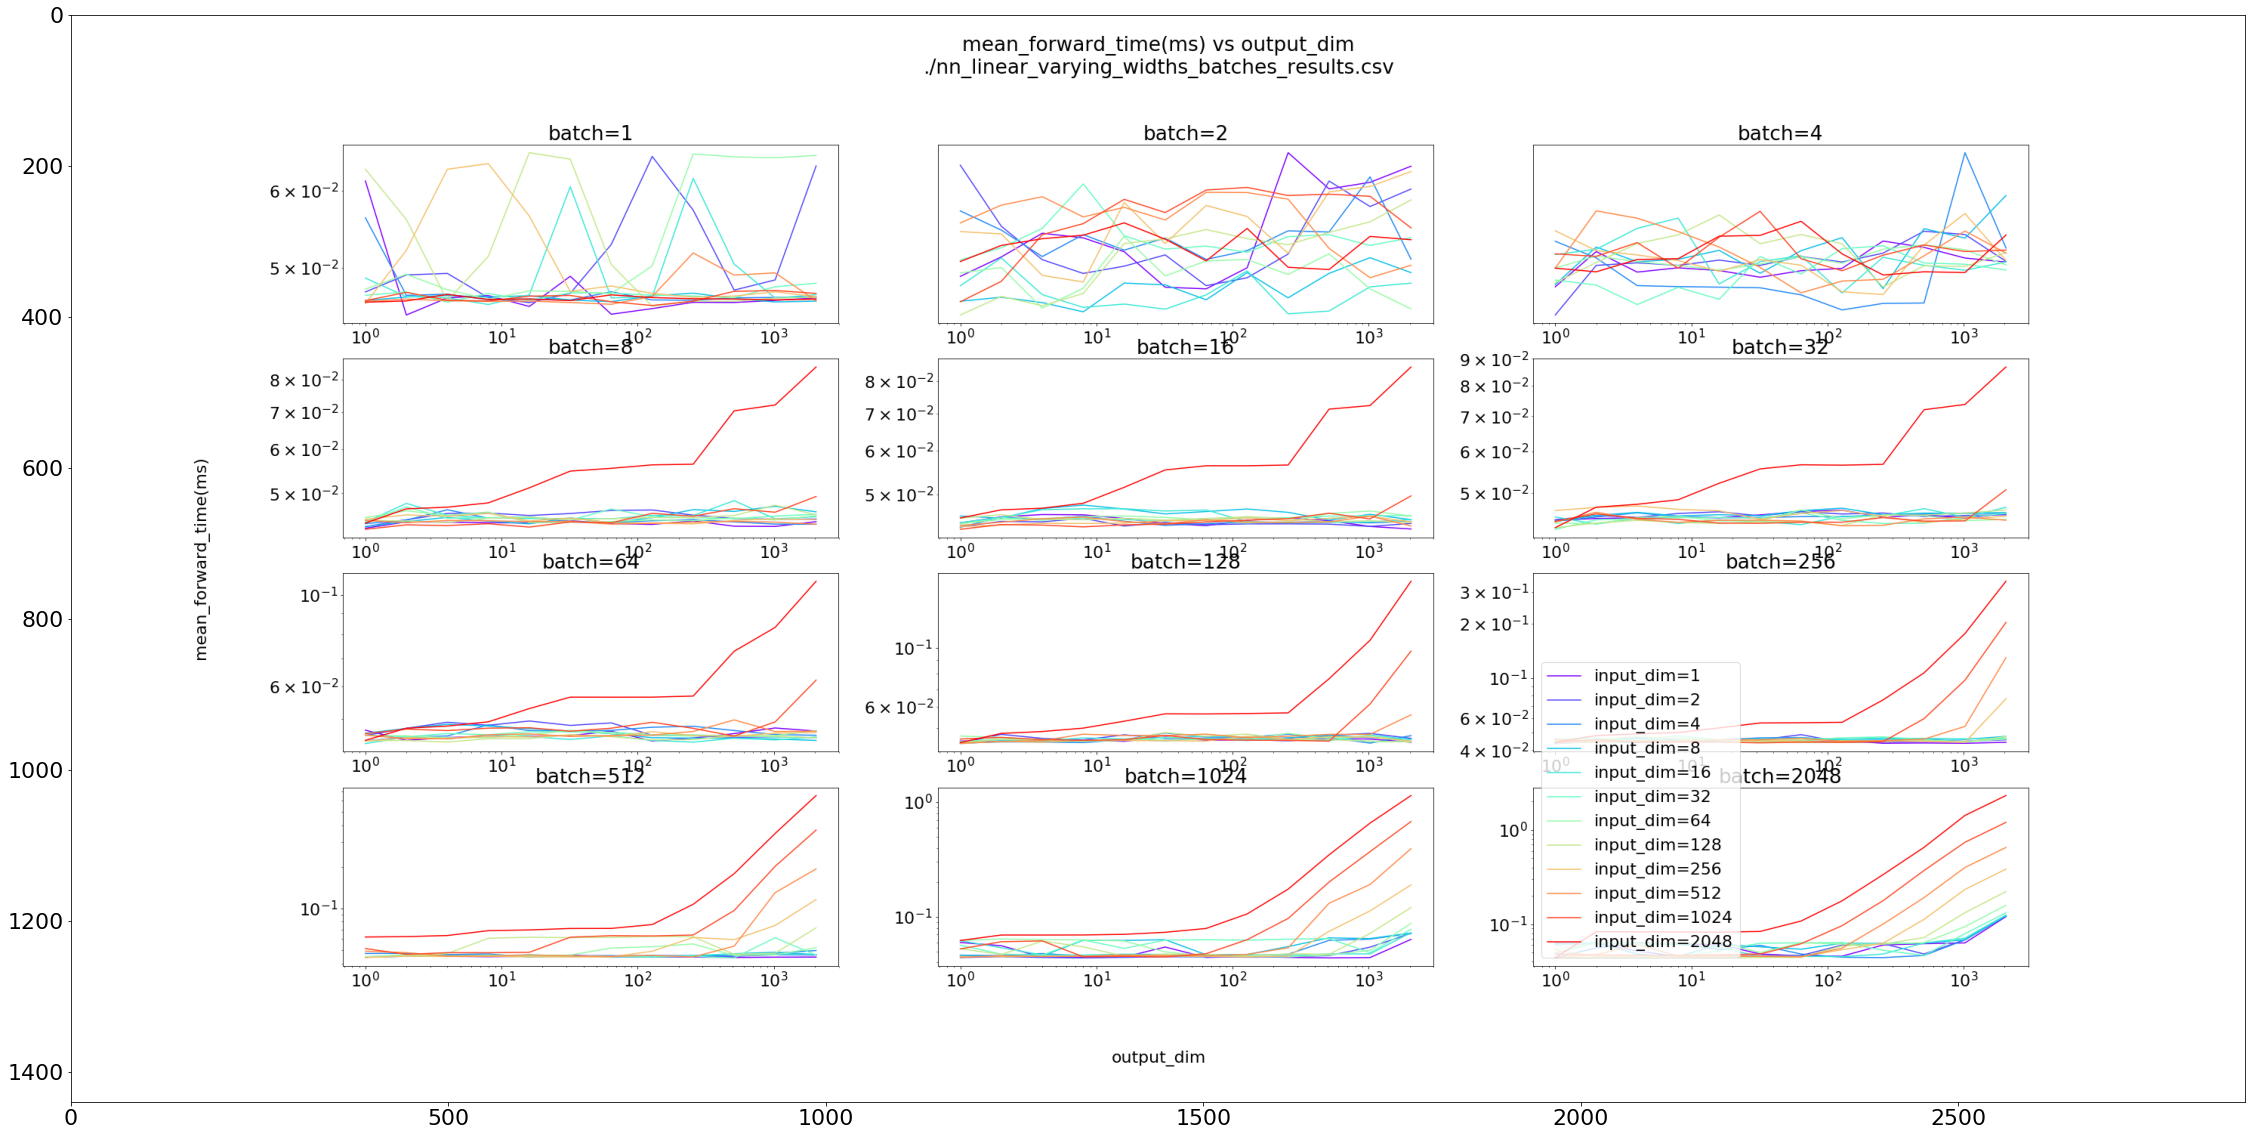

In [19]:
plt.imshow(mpimg.imread('./nn_linear_varying_widths_batches_results.csv.png'))

Custom Plot for OpenAI Presentation


Baseline


12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12
12 12


Text(0.06, 0.5, 'mean_forward_timems')

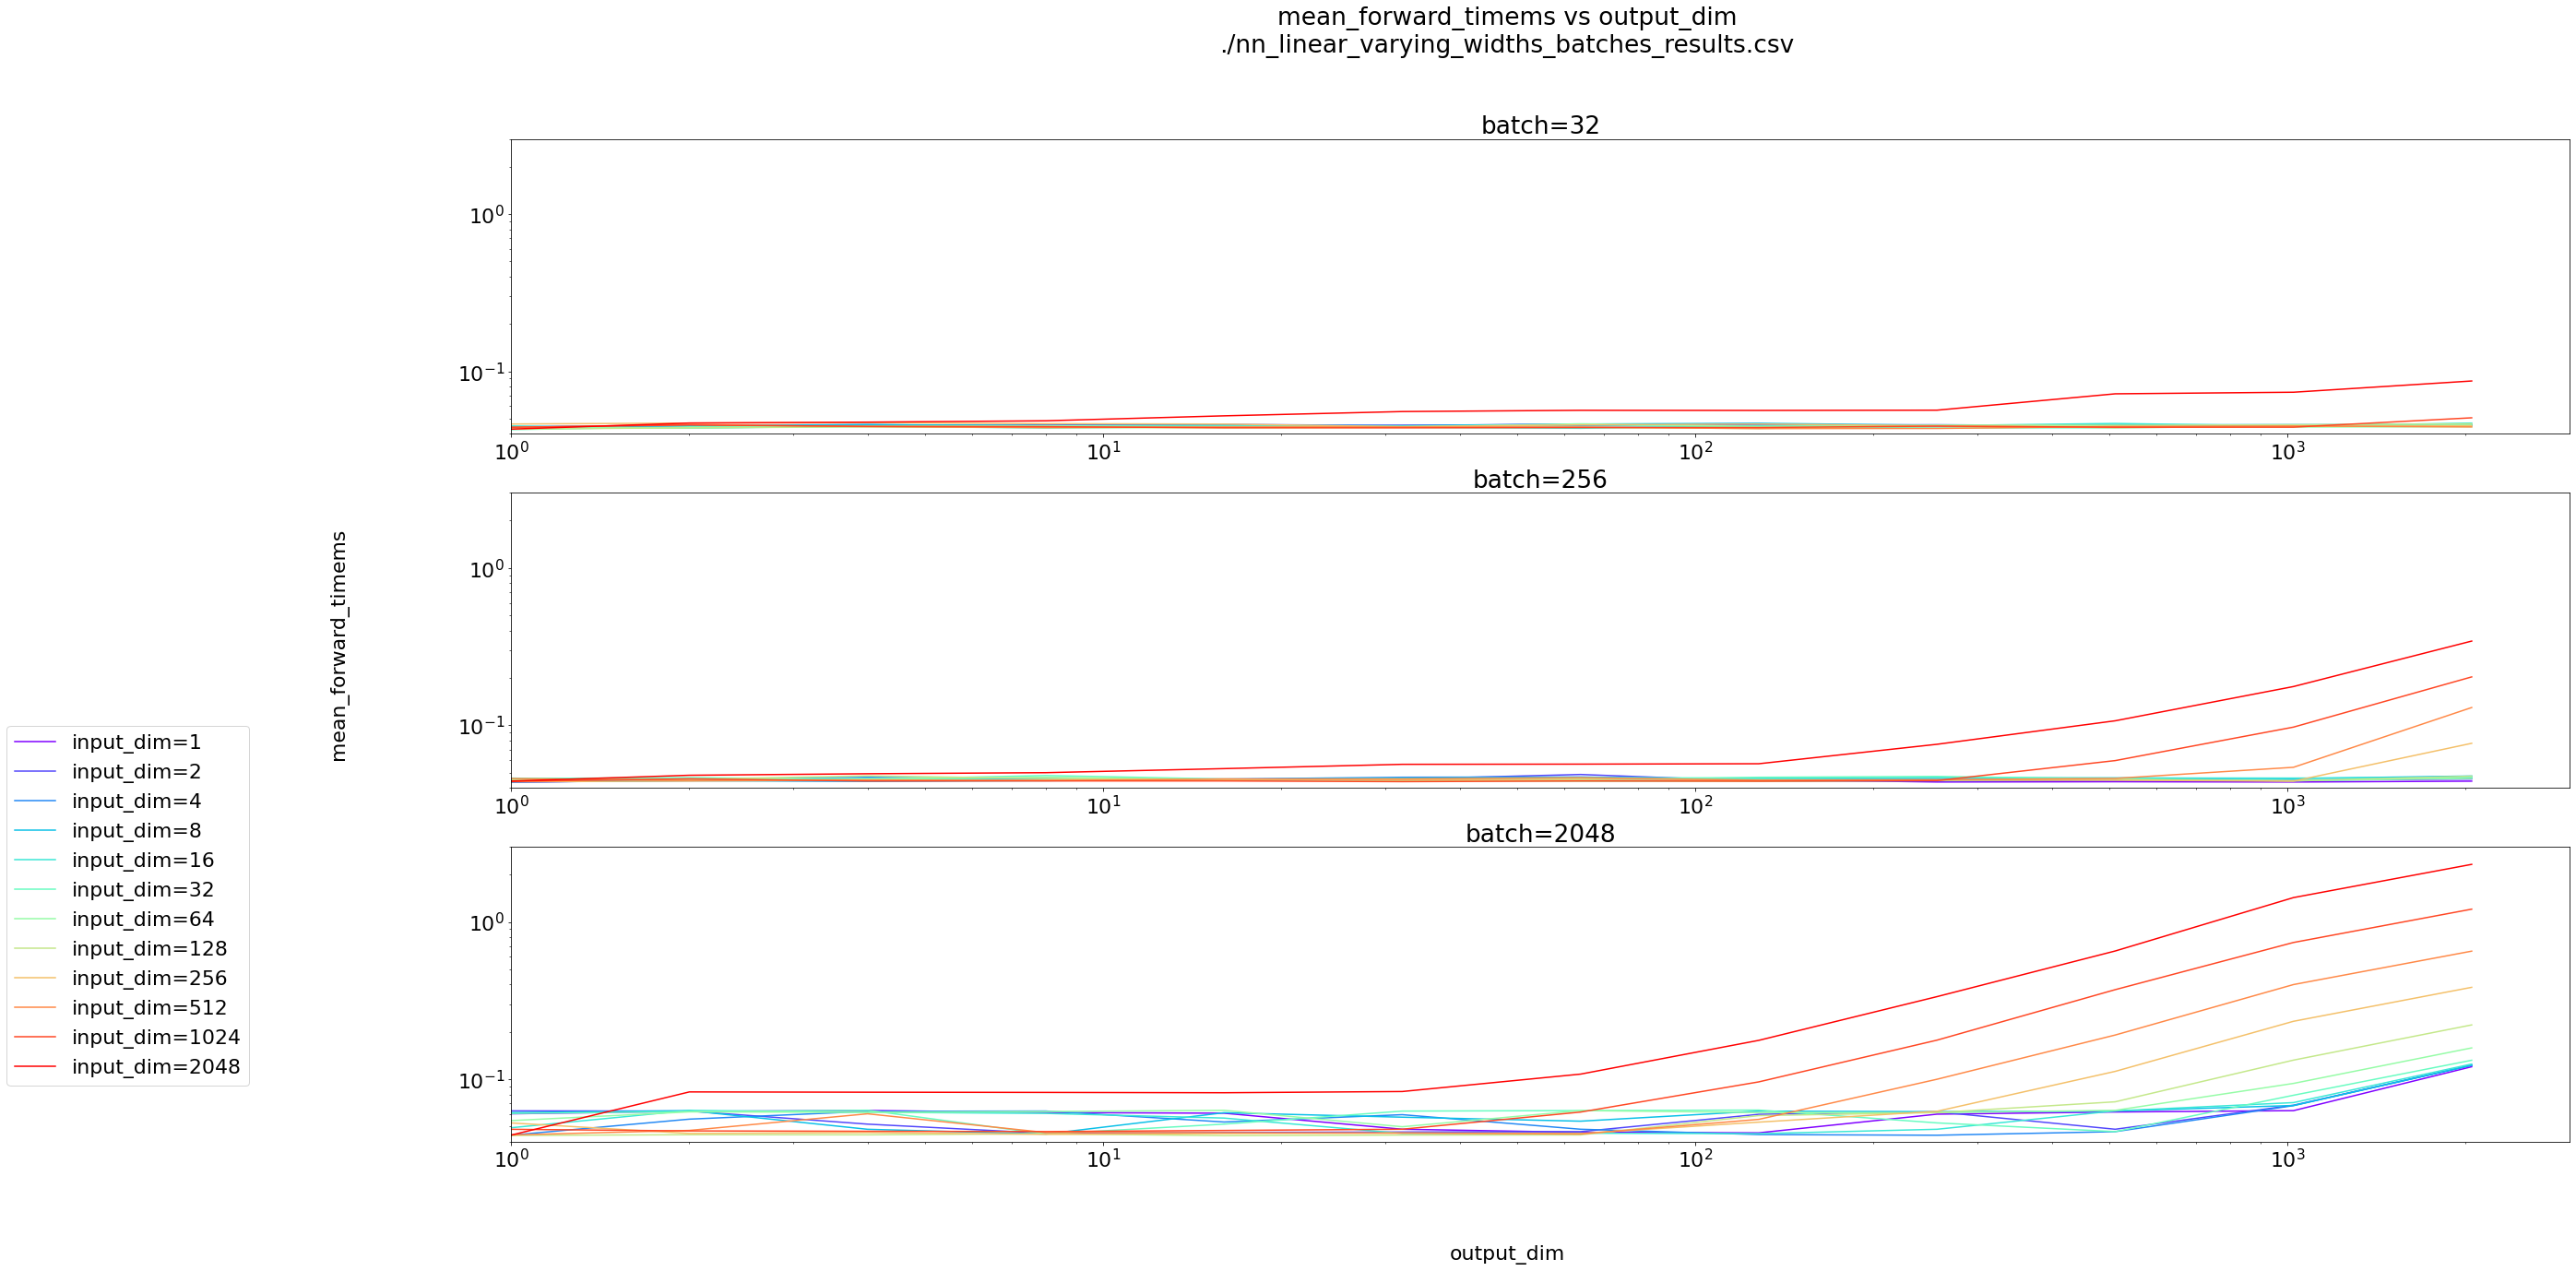

In [41]:
fig, axs = plt.subplots(3, 1)
colors = cm.rainbow(np.linspace(0, 1, len(unique_input_dims)))

for batch_number, batch in enumerate([32, 256, 2048]):
    data_batch_j = data[data['batch'] == batch]
    ax = axs.flat[batch_number]
    for number, i in enumerate(unique_input_dims):
        data_batch_j_input_dim_i__many_k = data_batch_j[data_batch_j['input_dim'] == i]
        data_batch_j_input_dim_i = data_batch_j_input_dim_i__many_k  # comment when running with k values
#         data_batch_j_input_dim_i = data_batch_j_input_dim_i__many_k[data_batch_j_input_dim_i__many_k['k'] == 64]  # select single k.  # uncomment when running with k values
#         ax.plot([2**i for i in range(len(unique_input_dims))], data_batch_j_input_dim_i['mean_forward_timems'], label='input_dim={}'.format(i), c=colors[number])
#         print(unique_input_dims)
        unique_output_dims = np.unique(data_batch_j_input_dim_i['output_dim'])
        print(len(data_batch_j_input_dim_i[FIELD]), len(unique_output_dims))
        # unique_input_dims = np.unique(data['input_dim'])
        # print(data_batch_j_input_dim_i)
        
        ax.plot(unique_output_dims, data_batch_j_input_dim_i[FIELD], label='input_dim={}'.format(i), c=colors[number])
        ax.title.set_text('batch={}'.format(batch))
        ax.set_yscale('log')  # comment this out for normal plot.
        ax.set_xscale('log')  # comment this out for normal plot.
        ax.set_ylim(bottom=4*1e-2, top=3)
        ax.set_xlim(left=1)

plt.suptitle(FIELD+' vs output_dim\n'+path_to_csv)
plt.legend(loc='center left'
           , bbox_to_anchor=(-0.25,0.8)
           
           
           
           
           
           
           
           
          )
fig.text(0.5, 0.04, 'output_dim', ha='center', va='center')
fig.text(0.06, 0.5, FIELD, ha='center', va='center', rotation='vertical')
# plt.savefig(path_to_csv+'.png')


CRS


6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6
6 6


Text(0.06, 0.5, 'mean_forward_timems')

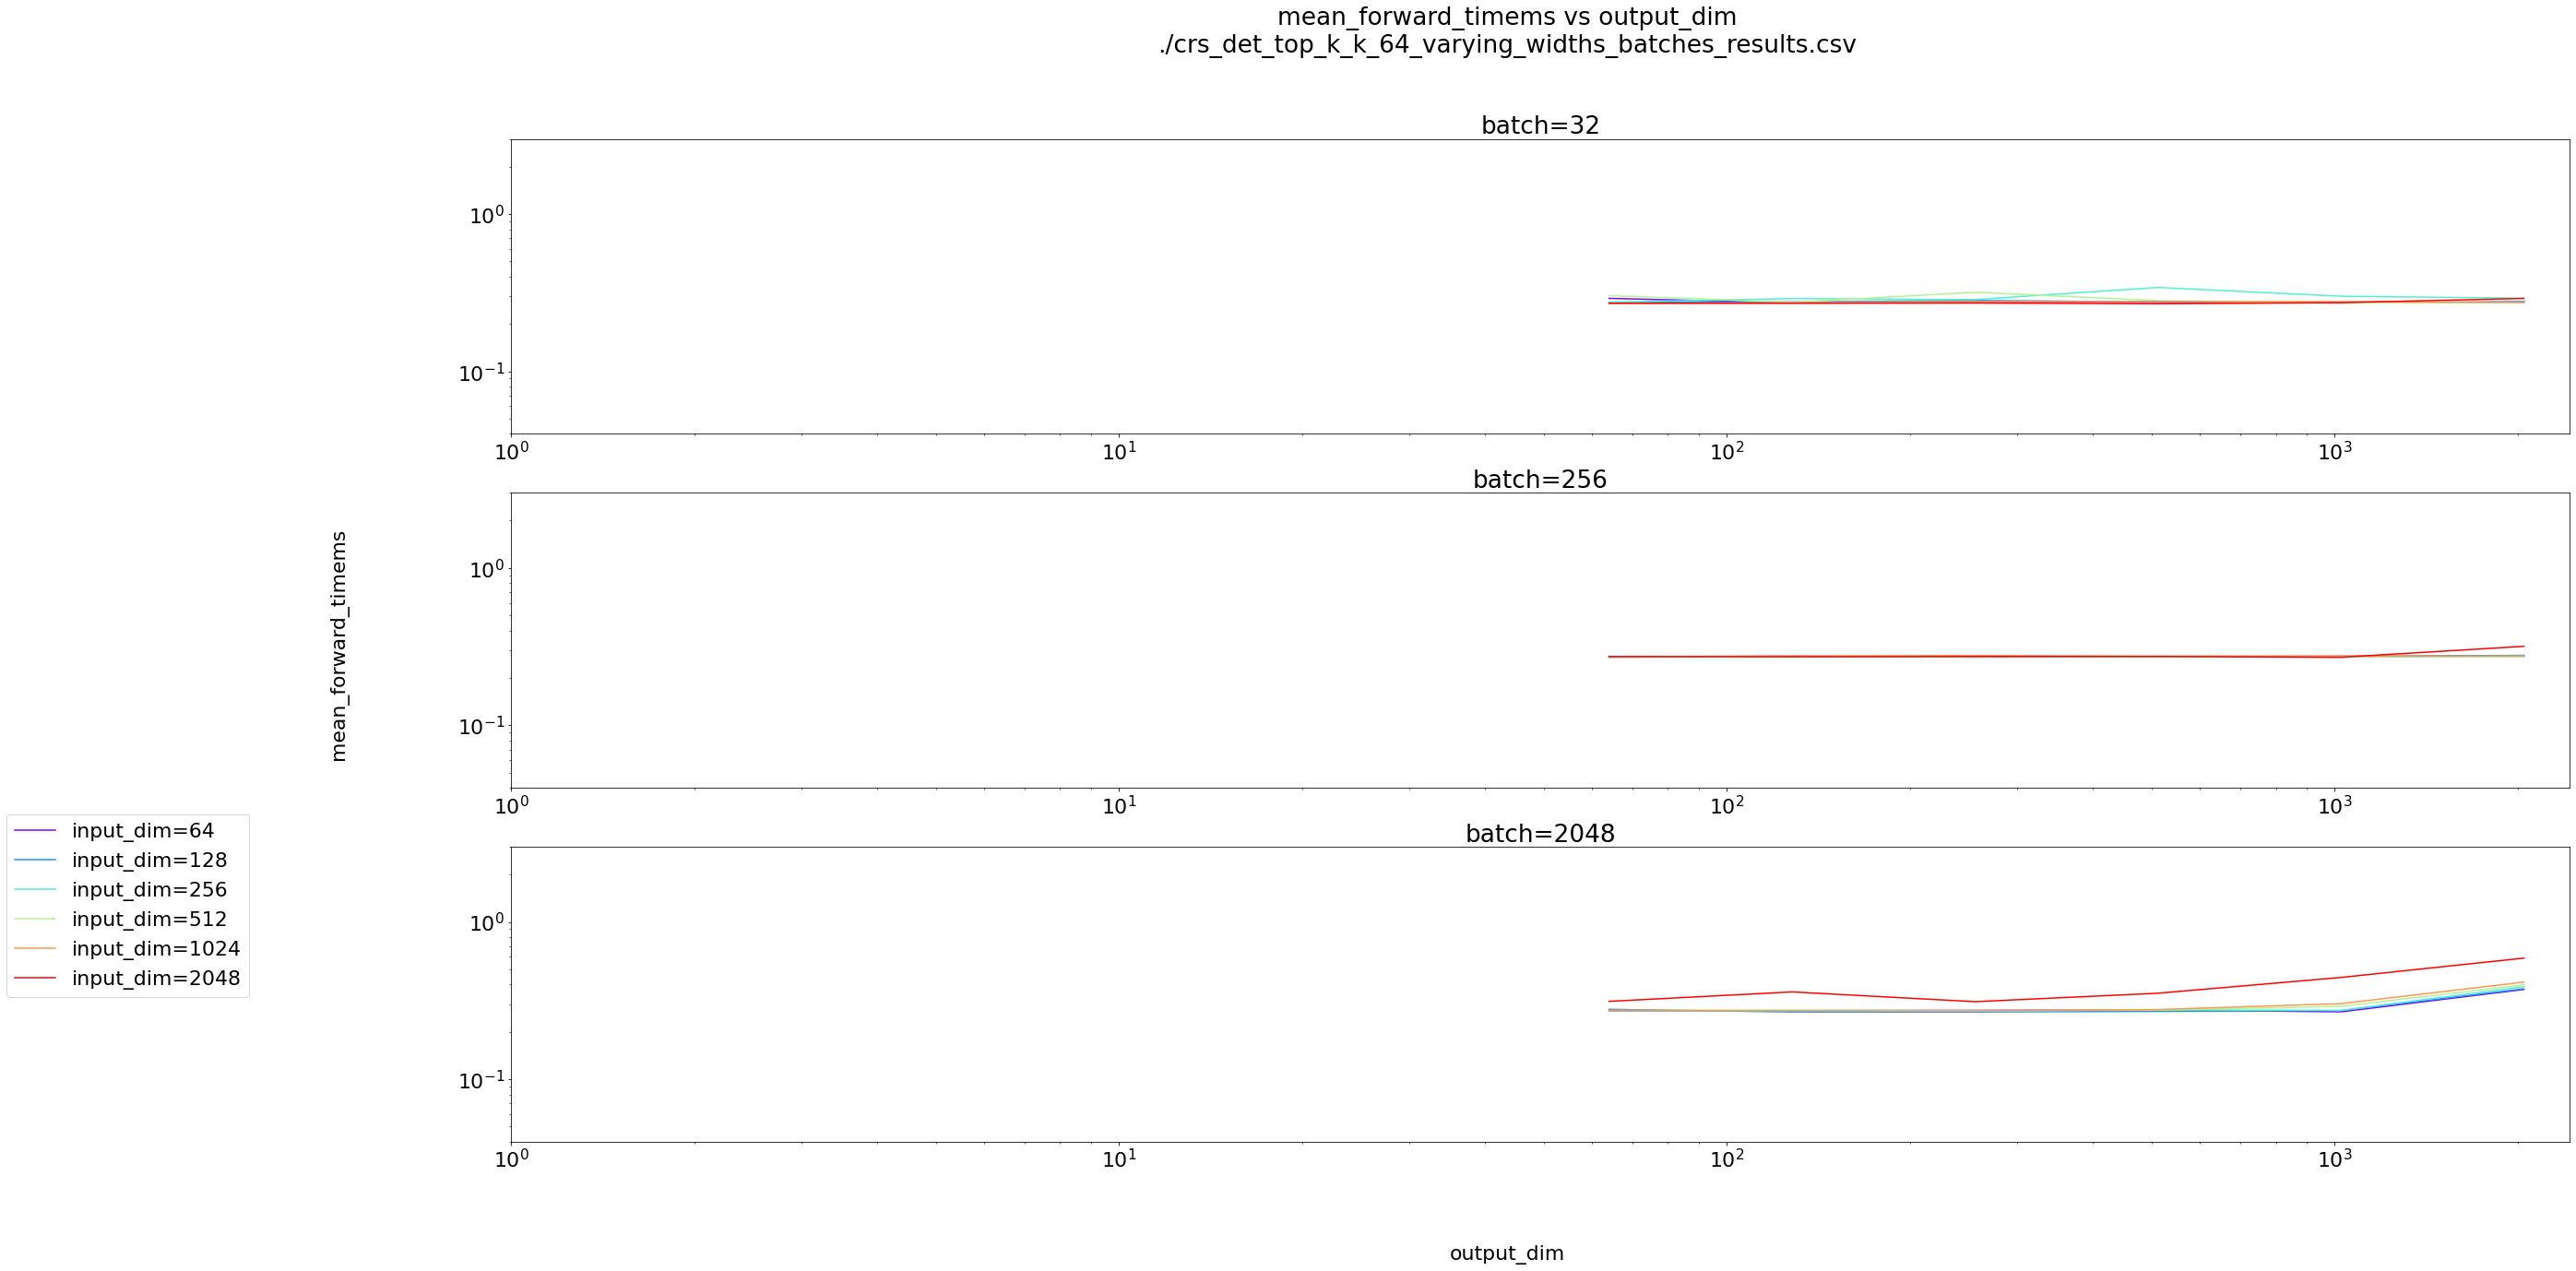

In [52]:
fig, axs = plt.subplots(3, 1)
colors = cm.rainbow(np.linspace(0, 1, len(unique_input_dims)))

for batch_number, batch in enumerate([32, 256, 2048]):
    data_batch_j = data[data['batch'] == batch]
    ax = axs.flat[batch_number]
    for number, i in enumerate(unique_input_dims):
        data_batch_j_input_dim_i__many_k = data_batch_j[data_batch_j['input_dim'] == i]
        data_batch_j_input_dim_i = data_batch_j_input_dim_i__many_k  # comment when running with k values
#         data_batch_j_input_dim_i = data_batch_j_input_dim_i__many_k[data_batch_j_input_dim_i__many_k['k'] == 64]  # select single k.  # uncomment when running with k values
#         ax.plot([2**i for i in range(len(unique_input_dims))], data_batch_j_input_dim_i['mean_forward_timems'], label='input_dim={}'.format(i), c=colors[number])
#         print(unique_input_dims)
        unique_output_dims = np.unique(data_batch_j_input_dim_i['output_dim'])
        print(len(data_batch_j_input_dim_i[FIELD]), len(unique_output_dims))
        # unique_input_dims = np.unique(data['input_dim'])
        # print(data_batch_j_input_dim_i)
        
        ax.plot(unique_output_dims, data_batch_j_input_dim_i[FIELD], label='input_dim={}'.format(i), c=colors[number])
        ax.title.set_text('batch={}'.format(batch))
        ax.set_yscale('log')  # comment this out for normal plot.
        ax.set_xscale('log')  # comment this out for normal plot.
        ax.set_ylim(bottom=4*1e-2, top=3)
        ax.set_xlim(left=1)

plt.suptitle(FIELD+' vs output_dim\n'+path_to_csv)
plt.legend(loc='center left'
           , bbox_to_anchor=(-0.25,0.8)
           
           
           
           
           
           
           
           
          )
fig.text(0.5, 0.04, 'output_dim', ha='center', va='center')
fig.text(0.06, 0.5, FIELD, ha='center', va='center', rotation='vertical')
# plt.savefig(path_to_csv+'.png')
